In [1]:
# global var set
import transformers
# model info, change as needed
batch_size = 16
num_epochs = 8

model_checkpoint = "bert-base-uncased"
# model_checkpoint = "roberta-base"
# model_checkpoint= 'distilbert-base-uncased-finetuned-sst-2-english'
metric_name = "f1"
# fileTag = "original-plutchik-v1"
fileTag = 'clean-v1'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [2]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [3]:
trainDatasetOriginal

,Unnamed: 0,storyid,linenum,char,emotionworkerid,context,sentence,affected,emotion,plutchik
0,0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,yes,"['joy', 'excited', 'content', 'hungry', 'antic...","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
1,1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann1,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,yes,"['excited', 'confident']","{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ..."
2,2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann0,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,yes,"['anxious', 'confident', 'positive']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ..."
3,3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,4,I (myself),ann1,I began making fish curry for my boyfriend and...,"When it was time to taste, I was disgusted.",yes,"['upset', 'sick']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ..."
4,4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,5,I (myself),ann1,I began making fish curry for my boyfriend and...,I accidentally used a whole garlic instead of ...,yes,"['disgusted', 'cretinous']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ..."
...,...,...,...,...,...,...,...,...,...,...
11605,11605,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,1,Marcus,ann0,NaN,Marcus was collecting shells on the beach.,yes,"['intrigued', 'happy', 'contemplative']","{'joy': 3, 'trust': 1, 'fear': 0, 'surprise': ..."
11606,11606,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,2,Marcus,ann0,Marcus was collecting shells on the beach.,He picked up a large beautiful shell.,yes,"['awestruck', 'moved', 'joy']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
11607,11607,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,3,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,He put it in his pocket to save for later.,yes,"['satisfied', 'excited', 'curiosity']","{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': ..."
11608,11608,2aa1aca3-9264-4e27-9ebb-fa5de8e7e84e,4,Marcus,ann0,Marcus was collecting shells on the beach.|He ...,Suddenly he felt a sharp pinch.,yes,"['pained', 'sore', 'surprised']","{'joy': 1, 'trust': 0, 'fear': 2, 'surprise': ..."


In [4]:
import ast
inputMode = "prevSent"
remapDataTrain = trainDatasetOriginal[[True if index != 0 and trainDatasetOriginal.iloc[index]['linenum'] > trainDatasetOriginal.iloc[index-1]['linenum'] else False for index, linenum in enumerate(trainDatasetOriginal['linenum'])]]['plutchik'].reset_index(drop=True)
trainDatasetProcessed = DataFrame({'sentence' : trainDatasetOriginal[[True if index != len(trainDatasetOriginal['linenum'])-1 and trainDatasetOriginal.iloc[index]['linenum'] < trainDatasetOriginal.iloc[index+1]['linenum'] else False for index, linenum in enumerate(trainDatasetOriginal['linenum'])]]['sentence'].reset_index(drop=True), 
                                   'joy'  : [0 if (ast.literal_eval(remapDataTrain[index]))['joy'] == 0 else 1 for index in range(remapDataTrain.shape[0])], 
                                   'trust' : [0 if (ast.literal_eval(remapDataTrain[index]))['trust'] == 0 else 1 for index in range(remapDataTrain.shape[0])], 
                                   'fear'  : [0 if (ast.literal_eval(remapDataTrain[index]))['fear'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'surprise': [0 if (ast.literal_eval(remapDataTrain[index]))['surprise'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'sadness': [0 if (ast.literal_eval(remapDataTrain[index]))['sadness'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'disgust': [0 if (ast.literal_eval(remapDataTrain[index]))['disgust'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'anger': [0 if (ast.literal_eval(remapDataTrain[index]))['anger'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'anticipation': [0 if (ast.literal_eval(remapDataTrain[index]))['anticipation'] == 0 else 1 for index in range(remapDataTrain.shape[0])]})

remapDataTest = testDatasetOriginal[[True if index != 0 and testDatasetOriginal.iloc[index]['linenum'] > testDatasetOriginal.iloc[index-1]['linenum'] else False for index, linenum in enumerate(testDatasetOriginal['linenum'])]]['plutchik'].reset_index(drop=True)
testDatasetProcessed = DataFrame({'sentence' : testDatasetOriginal[[True if index != len(testDatasetOriginal['linenum'])-1 and testDatasetOriginal.iloc[index]['linenum'] < testDatasetOriginal.iloc[index+1]['linenum'] else False for index, linenum in enumerate(testDatasetOriginal['linenum'])]]['sentence'].reset_index(drop=True), 
                                   'joy'  : [0 if (ast.literal_eval(remapDataTest[index]))['joy'] == 0 else 1 for index in range(remapDataTest.shape[0])], 
                                   'trust' : [0 if (ast.literal_eval(remapDataTest[index]))['trust'] == 0 else 1 for index in range(remapDataTest.shape[0])], 
                                   'fear'  : [0 if (ast.literal_eval(remapDataTest[index]))['fear'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'surprise': [0 if (ast.literal_eval(remapDataTest[index]))['surprise'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'sadness': [0 if (ast.literal_eval(remapDataTest[index]))['sadness'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'disgust': [0 if (ast.literal_eval(remapDataTest[index]))['disgust'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'anger': [0 if (ast.literal_eval(remapDataTest[index]))['anger'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'anticipation': [0 if (ast.literal_eval(remapDataTest[index]))['anticipation'] == 0 else 1 for index in range(remapDataTest.shape[0])]})


In [4]:
import ast
inputMode = "context+prevSent"
remapDataTrain = trainDatasetOriginal[[True if index != 0 and trainDatasetOriginal.iloc[index]['linenum'] > trainDatasetOriginal.iloc[index-1]['linenum'] else False for index, linenum in enumerate(trainDatasetOriginal['linenum'])]]['plutchik'].reset_index(drop=True)
contextInfoTrain = trainDatasetOriginal[[True if index != len(trainDatasetOriginal['linenum'])-1 and trainDatasetOriginal.iloc[index]['linenum'] < trainDatasetOriginal.iloc[index+1]['linenum'] else False for index, linenum in enumerate(trainDatasetOriginal['linenum'])]].reset_index(drop=True)
trainDatasetProcessed = DataFrame({'sentence' : [x.replace("|", " ") for x in contextInfoTrain['context'].fillna("") + " " +contextInfoTrain['sentence']], 
                                   'joy'  : [0 if (ast.literal_eval(remapDataTrain[index]))['joy'] == 0 else 1 for index in range(remapDataTrain.shape[0])], 
                                   'trust' : [0 if (ast.literal_eval(remapDataTrain[index]))['trust'] == 0 else 1 for index in range(remapDataTrain.shape[0])], 
                                   'fear'  : [0 if (ast.literal_eval(remapDataTrain[index]))['fear'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'surprise': [0 if (ast.literal_eval(remapDataTrain[index]))['surprise'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'sadness': [0 if (ast.literal_eval(remapDataTrain[index]))['sadness'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'disgust': [0 if (ast.literal_eval(remapDataTrain[index]))['disgust'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'anger': [0 if (ast.literal_eval(remapDataTrain[index]))['anger'] == 0 else 1 for index in range(remapDataTrain.shape[0])],
                                   'anticipation': [0 if (ast.literal_eval(remapDataTrain[index]))['anticipation'] == 0 else 1 for index in range(remapDataTrain.shape[0])]})

remapDataTest = testDatasetOriginal[[True if index != 0 and testDatasetOriginal.iloc[index]['linenum'] > testDatasetOriginal.iloc[index-1]['linenum'] else False for index, linenum in enumerate(testDatasetOriginal['linenum'])]]['plutchik'].reset_index(drop=True)
contextInfoTest = testDatasetOriginal[[True if index != len(testDatasetOriginal['linenum'])-1 and testDatasetOriginal.iloc[index]['linenum'] < testDatasetOriginal.iloc[index+1]['linenum'] else False for index, linenum in enumerate(testDatasetOriginal['linenum'])]].reset_index(drop=True)
testDatasetProcessed = DataFrame({'sentence' : [x.replace("|", " ") for x in contextInfoTest['context'].fillna("") + " " +contextInfoTest['sentence']], 
                                   'joy'  : [0 if (ast.literal_eval(remapDataTest[index]))['joy'] == 0 else 1 for index in range(remapDataTest.shape[0])], 
                                   'trust' : [0 if (ast.literal_eval(remapDataTest[index]))['trust'] == 0 else 1 for index in range(remapDataTest.shape[0])], 
                                   'fear'  : [0 if (ast.literal_eval(remapDataTest[index]))['fear'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'surprise': [0 if (ast.literal_eval(remapDataTest[index]))['surprise'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'sadness': [0 if (ast.literal_eval(remapDataTest[index]))['sadness'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'disgust': [0 if (ast.literal_eval(remapDataTest[index]))['disgust'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'anger': [0 if (ast.literal_eval(remapDataTest[index]))['anger'] == 0 else 1 for index in range(remapDataTest.shape[0])],
                                   'anticipation': [0 if (ast.literal_eval(remapDataTest[index]))['anticipation'] == 0 else 1 for index in range(remapDataTest.shape[0])]})

In [5]:
trainDatasetProcessed.to_csv(f'./dataset/nextEmo/emoDetect-{fileTag}-{inputMode}-train.csv')
trainDatasetProcessed

,sentence,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
0,I began making fish curry for my boyfriend an...,1,1,0,0,0,0,0,1
1,I began making fish curry for my boyfriend and...,1,1,0,0,0,0,0,1
2,I began making fish curry for my boyfriend and...,0,0,1,1,0,1,1,0
3,I began making fish curry for my boyfriend and...,0,0,0,1,1,1,1,0
4,Jervis has been single for a long time.,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
9134,Winston bought a brand new car today. He drove...,0,0,1,1,1,0,1,0
9135,Marcus was collecting shells on the beach.,1,1,0,1,0,0,0,1
9136,Marcus was collecting shells on the beach. He ...,1,1,0,1,0,0,0,1
9137,Marcus was collecting shells on the beach. He ...,1,0,1,1,1,1,1,1


In [6]:
testDatasetProcessed.to_csv(f'./dataset/nextEmo/emoDetect-{fileTag}-{inputMode}-test.csv')
testDatasetProcessed

,sentence,joy,trust,fear,surprise,sadness,disgust,anger,anticipation
0,A cook was carrying an armful of oranged in t...,0,0,0,1,0,0,1,0
1,A cook was carrying an armful of oranged in th...,1,1,0,0,0,0,0,0
2,A cook was carrying an armful of oranged in th...,1,1,0,1,0,1,1,1
3,A cook was carrying an armful of oranged in th...,1,0,0,1,0,0,0,1
4,Valerie was getting ready for a formal dance.,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8766,Carol woke up to use the restroom at night. Sh...,0,0,0,1,0,0,1,1
8767,Carol woke up to use the restroom at night. Sh...,0,0,1,1,0,0,0,1
8768,Rosemary was eating a snack. She was at a part...,1,1,0,0,0,0,1,1
8769,Rosemary was eating a snack. She was at a part...,0,0,0,0,1,1,0,0


# Start convert and train

In [7]:
from datasets import load_dataset, load_metric
dataset = load_dataset('csv', data_files={'train': f'./dataset/nextEmo/emoDetect-{fileTag}-{inputMode}-train.csv', 
                                           'test': f'./dataset/nextEmo/emoDetect-{fileTag}-{inputMode}-test.csv'})
dataset

Using custom data configuration default-1cb259830675872c


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-1cb259830675872c\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'sentence', 'joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation'],
        num_rows: 9139
    })
    test: Dataset({
        features: ['Unnamed: 0', 'sentence', 'joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation'],
        num_rows: 8771
    })
})

Let's check the first example of the training split:

In [8]:
example = dataset['train'][1]
example

{'Unnamed: 0': 1,
 'sentence': "I began making fish curry for my boyfriend and I. I decided not to read a recipe since I've made so many in my life.",
 'joy': 1,
 'trust': 1,
 'fear': 0,
 'surprise': 0,
 'sadness': 0,
 'disgust': 0,
 'anger': 0,
 'anticipation': 1}

The dataset consists of tweets, labeled with one or more emotions. 

Let's create a list that contains the labels, as well as 2 dictionaries that map labels to integers and back.

In [9]:
labels = [label for label in dataset['train'].features.keys() if label not in ['Unnamed: 0', 'sentence']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['joy',
 'trust',
 'fear',
 'surprise',
 'sadness',
 'disgust',
 'anger',
 'anticipation']

## Preprocess data

As models like BERT don't expect text as direct input, but rather `input_ids`, etc., we tokenize the text using the tokenizer. Here I'm using the `AutoTokenizer` API, which will automatically load the appropriate tokenizer based on the checkpoint on the hub.

In [10]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def preprocess_data(examples):
    # take a batch of texts
    text = examples["sentence"]
    # encode them
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
    # add labels
    labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
    # create numpy array of shape (batch_size, num_labels)
    labels_matrix = np.zeros((len(text), len(labels)))
    # fill numpy array
    for idx, label in enumerate(labels):
        labels_matrix[:, idx] = labels_batch[label]
    encoding["labels"] = labels_matrix.tolist()
    return encoding

In [11]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

Parameter 'function'=<function preprocess_data at 0x00000237C85171F0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/9 [00:00<?, ?ba/s]

In [12]:
example = encoded_dataset['train'][2]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [13]:
tokenizer.decode(example['input_ids'])

"[CLS] i began making fish curry for my boyfriend and i. i decided not to read a recipe since i've made so many in my life. i let the curry sit before tasting. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"

In [14]:
example['labels']

[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]

In [15]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['fear', 'surprise', 'disgust', 'anger']

Finally, we set the format of our data to PyTorch tensors. This will turn the training, validation and test sets into standard PyTorch [datasets](https://pytorch.org/docs/stable/data.html). 

In [16]:
encoded_dataset.set_format("torch")

## Define model

Here we define a model that includes a pre-trained base (i.e. the weights from bert-base-uncased) are loaded, with a random initialized classification head (linear layer) on top. One should fine-tune this head, together with the pre-trained base on a labeled dataset.

In [17]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id, 
                                                           ignore_mismatched_sizes=True)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Train the model

In [18]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    # learning_rate=9e-7,
    learning_rate=6e-6,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

We are also going to compute metrics while training. For this, we need to define a `compute_metrics` function, that returns a dictionary with the desired metric values.

In [19]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
from sklearn import metrics
import torch
import matplotlib.pyplot as plt

validationInfo = []
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')    
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    validationInfo.append([y_true, probs])
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

Let's verify a batch as well as a forward pass:

In [20]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [21]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  1045,  2211,  2437,  3869, 15478,  2005,  2026,  6898,  1998,
         1045,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [22]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.7356, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.2351,  0.1115,  0.0854, -0.0059, -0.2331, -0.4888,  0.7476, -0.2108]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Let's start training!

In [23]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [24]:
trainer.train()

C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 9139
  Num Epochs = 8
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4576


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.633200,0.589694,0.627686,0.678551,0.104321
2,0.586100,0.584000,0.630949,0.683387,0.123361
3,0.564100,0.584385,0.632848,0.681962,0.125869
4,0.547300,0.590396,0.637523,0.682796,0.132026
5,0.522800,0.595353,0.635525,0.681447,0.131912
6,0.513100,0.603702,0.632318,0.678363,0.130088
7,0.491400,0.606635,0.628940,0.675193,0.120853
8,0.483500,0.609241,0.629517,0.676009,0.124501


***** Running Evaluation *****
  Num examples = 8771
  Batch size = 16
Saving model checkpoint to bert-finetuned-sem_eval-english\checkpoint-572
Configuration saved in bert-finetuned-sem_eval-english\checkpoint-572\config.json
Model weights saved in bert-finetuned-sem_eval-english\checkpoint-572\pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english\checkpoint-572\tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval-english\checkpoint-572\special_tokens_map.json
***** Running Evaluation *****
  Num examples = 8771
  Batch size = 16
Saving model checkpoint to bert-finetuned-sem_eval-english\checkpoint-1144
Configuration saved in bert-finetuned-sem_eval-english\checkpoint-1144\config.json
Model weights saved in bert-finetuned-sem_eval-english\checkpoint-1144\pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english\checkpoint-1144\tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval-english\check

TrainOutput(global_step=4576, training_loss=0.5373998922067922, metrics={'train_runtime': 1030.5887, 'train_samples_per_second': 70.942, 'train_steps_per_second': 4.44, 'total_flos': 4809402946043904.0, 'train_loss': 0.5373998922067922, 'epoch': 8.0})

# ROC curve generate

In [26]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import pandas as pd

y_test = validationInfo[pd.DataFrame(trainer.state.log_history)['eval_accuracy'].dropna().reset_index(drop=True).idxmax()][0]
y_score = validationInfo[pd.DataFrame(trainer.state.log_history)['eval_accuracy'].dropna().reset_index(drop=True).idxmax()][1]
plt.rcParams['figure.figsize'] = (10.0, 6.0)
currentAcc = round(pd.DataFrame(trainer.state.log_history)['eval_accuracy'].dropna().reset_index(drop=True).max() * 100, 2)
n_classes = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for index, label in enumerate(id2label.values()):
    fpr[label], tpr[label], _ = roc_curve(y_test[:, index], y_score[:, index])
    roc_auc[label] = auc(fpr[label], tpr[label])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

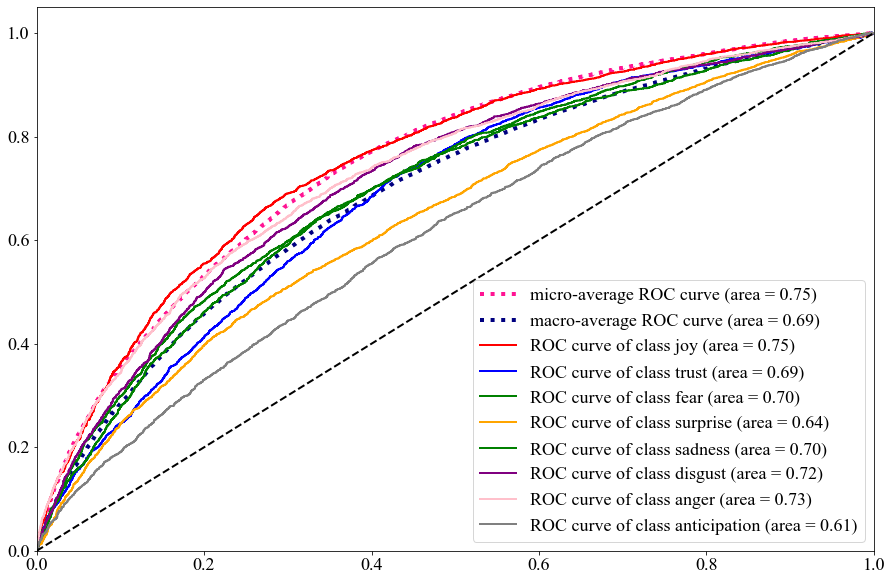

In [32]:
# First aggregate all false positive rates
plt.rcParams.update({'font.size': 18, 'font.family': 'Times New Roman'})
plt.rcParams['figure.figsize'] = (15.0, 10.0) 
all_fpr = np.unique(np.concatenate([fpr[label] for index, label in enumerate(id2label.values())]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for index, label in enumerate(id2label.values()):
    mean_tpr += np.interp(all_fpr, fpr[label], tpr[label])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["red", "blue", "green", "orange", "green", "purple", "pink", "grey"])
for i, color in zip([label for index, label in enumerate(id2label.values())], colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title(f"ROC curve", loc = 'right')
# plt.title(f"data: {fileTag} \
#           \ninput: previous sentence + previous context\
#           \nmodel: {model_checkpoint}\
#           \ntask: current sentence --> next emotion\
#           \nmax acc: {currentAcc}%", loc='left')
plt.legend(loc="lower right")
plt.savefig('result.pdf', bbox_inches="tight")

In [28]:
import pandas as pd
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/nextEmo/TI-{model_checkpoint}-{fileTag}-{inputMode}.csv')

## Inference

Let's test the model on a new sentence:

In [43]:
text = "I'm sad and want to die"

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

The logits that come out of the model are of shape (batch_size, num_labels). As we are only forwarding a single sentence through the model, the `batch_size` equals 1. The logits is a tensor that contains the (unnormalized) scores for every individual label.

In [44]:
logits = outputs.logits
logits.shape

torch.Size([1, 8])

To turn them into actual predicted labels, we first apply a sigmoid function independently to every score, such that every score is turned into a number between 0 and 1, that can be interpreted as a "probability" for how certain the model is that a given class belongs to the input text.

Next, we use a threshold (typically, 0.5) to turn every probability into either a 1 (which means, we predict the label for the given example) or a 0 (which means, we don't predict the label for the given example).

In [45]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1
# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

['joy', 'trust', 'anticipation']
